# SMAI Assignment - 2

## Question - `1` : Clustering

| | |
|- | -|
| Course | Statistical Methods in AI |
| Release Date | `16.02.2023` |
| Due Date | `24.02.2023` |

**Part 1:** 

Use the **Fashion-MNIST** dataset for this question.

**About the dataset:**
Each image is 28 pixels in height and 28 pixels in width, for a total of 784 pixels in total. Each pixel has a single pixel-value associated with it, indicating the lightness or darkness of that pixel, with higher numbers meaning darker. This pixel-value is an integer between 0 and 255. The training and test data sets have 785 columns. The first column consists of the class labels (see above), and represents the article of clothing. The rest of the columns contain the pixel-values of the associated image. You can check out the dataset here: https://www.kaggle.com/datasets/zalando-research/fashionmnist

1a) Load the dataset and use the K Means algorithm **(You are allowed to use the library)**. You need to find the optimal number of clusters using the
> i) elbow method
    >> Plot the graph between average distance and the number of clusters graph while using the elbow method. Report the optimal number of clusters found. Implement this method on your own.

> ii) silhoette method
    >> Plot the graph between silhoutte score and number of clusters using silhoette method. Report the optimal number of clusters found. You can use the functions provided by sklearn.metrics.

1b) Experiment with different cluster initialisation methods [k-means++, forgy ("random" in sklearn)]. (init parameter in KMeans class) 


1c) Visualize the dataset to depict the clusters formed. Here you can leverage methods like PCA to reduce the data to 2-3 dimensions and visualize using scatter plots. Color the points according to the clusters (you can use T-SNE or any other matplotlib method)

</br>
</br>
</br>
</br>


**Part 2:**
</br>
In this task, you need to implement Hierarchical clustering (agglomerative) on the same dataset.

2a) visualize a dendogram and find out the optimal number of clusters with the help of Dendogram. Explain the procedure.


2b) Implement Hierarchical clustering using: </br>
> i) single linkage

> ii) Complete linkage

Visualize the clusters obtained using these linkages and compare. 

</br>
</br>
</br>
</br>

**Part 3:**
</br>
In this part, we’ll implement kmeans to compress an image. In an original image each pixel has 3 8-bit integers, therefore the size of the image is **3 x height x width x 8**. Our task is to compress the image where it only comprises of **k** unique colors, where k = number of clusters formed by the algorithm where each pixel is a 3D datapoint. Therefore the new compressed image can be stored in **k x 24 + width x height x b**. (b -> number of bits used to represent the integer *k*, since each pixel will have a color value from 0 to k-1). Now your task is to experiment with different values of k (atleast 3) and show the compressed image along with the value of data reduction (in terms of bits). 

(an example image has been provided in the folder)

## Part1: K Means

In [20]:
!pip install kneed

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [21]:
#implement elbow method from scratch
from kneed import KneeLocator
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn.cluster as cluster
from sklearn.preprocessing import StandardScaler
import sklearn.metrics as metrics

def elbow(X,method):
    # no_of_clusters = [i for i in range(2,21)]
    no_of_clusters = list(range(2, 21))
    sum_of_squares = []
    for n in no_of_clusters:
        sk_kmeans=cluster.KMeans(n_clusters=n,init=method)
        kmeans=sk_kmeans.fit(X)
        labels=kmeans.cluster_centers_
        y=kmeans.labels_
        distance=0
        for i in range(len(X)):
            label=y[i]
            center=labels[label]
            distance+=np.sum(np.square((X[i]-center)))
        sum_of_squares.append(distance)

    kl = KneeLocator(no_of_clusters, sum_of_squares, curve="convex", direction="decreasing")
    print(kl.elbow)
    my_center = pd.DataFrame({'clusters' : no_of_clusters, 'wss' : sum_of_squares})
    sns.lineplot(x = 'clusters', y = 'wss', data = my_center, marker="+")
    my_center


In [22]:
import sklearn.metrics as metrics
def silhouette(X,method):
  silhouette_range = range(2,20)
  silhouette_lst = []
  for i in silhouette_range:
      label=cluster.KMeans(n_clusters=i,init=method,random_state=200).fit(X).labels_
      score = metrics.silhouette_score(X,label,metric="euclidean",sample_size=1000,random_state=200)
      silhouette_lst.append(score)
      # print ("Silhouette score for cluster value k = "+str(i)+" is "+str(metrics.silhouette_score(X,label,metric="euclidean",sample_size=1000,random_state=200)))
  silhouette_centers = pd.DataFrame({'Clusters' : silhouette_range, 'Sil Score' : silhouette_lst})
  sns.lineplot(x = 'Clusters', y = 'Sil Score', data = silhouette_centers, marker="+")

In [23]:
# LOADING THE DATASET. Take only the test split (10000 samples)
from keras.datasets import fashion_mnist
import numpy as np

(trainX, trainy), (testX, testy) = fashion_mnist.load_data()
X = testX.reshape(testX.shape[0] , -1)
y = np.copy(testy)
print("10K images flattened: " , X.shape , " and 10k labels: " , y.shape)

10K images flattened:  (10000, 784)  and 10k labels:  (10000,)


In [24]:
# Perform KMeans using sklearn's KMeans. (Perform appropriate scaling)
scaler = StandardScaler()
scaled_features = scaler.fit_transform(X)
kmeans=cluster.KMeans(n_clusters=7,init="k-means++")
kmeans=kmeans.fit(X)

7


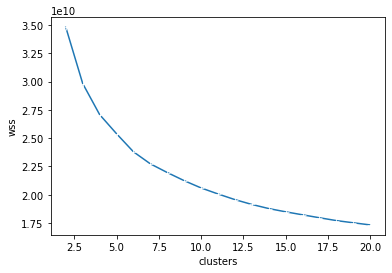

In [25]:
# Visualize the results from elbow method and silhoutte method. (Vary the value of k from around 2-3 to 20)
elbow(X,"k-means++")

7


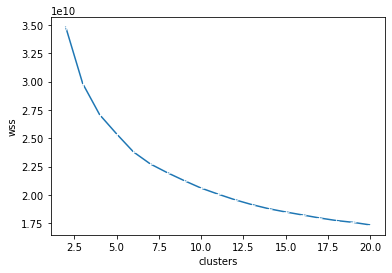

In [26]:
elbow(X,"random")

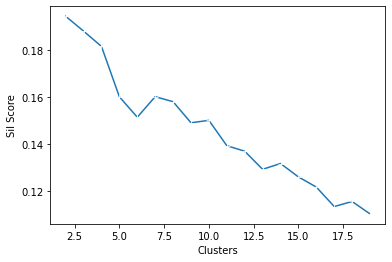

In [27]:
silhouette(X,"k-means++")

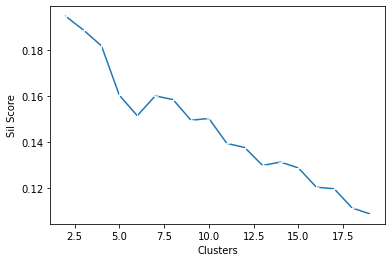

In [28]:
silhouette(X,"random")

(10000, 2)


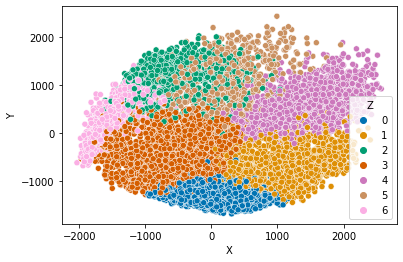

In [29]:
# Visualize the clusters formed by Kmeans (Use PCA to reduce dimensions and plot scatter plot. You can show the original ground truth labels in one plot and then the predicted clusters in another plot)
from sklearn.decomposition import PCA
  
pca = PCA(n_components = 2)
X_random = pca.fit_transform(X)
print(X_random.shape)
X_random_df = pd.DataFrame(X_random,columns=['X','Y'])
Clusters = pd.DataFrame(kmeans.labels_,columns=["Z"])
Clusters = Clusters.reset_index(drop=True)
X_random_df = X_random_df.join(Clusters)
g = sns.scatterplot(x="X", y="Y", hue="Z",data=X_random_df, palette='colorblind', legend='full')

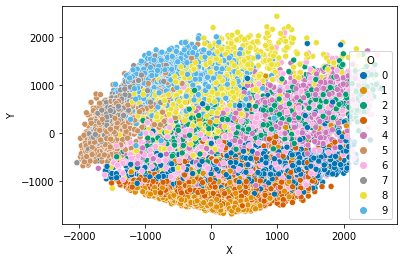

In [30]:
Y_df = pd.DataFrame(y,columns=["O"])
Y_df= Y_df.reset_index(drop=True)
X_random_df=X_random_df.join(Y_df)
g = sns.scatterplot(x="X", y="Y", hue="O",data=X_random_df, palette='colorblind', legend='full')

## Part2: Hierarchical clustering

In [31]:
# implement hierarchical clustering ( you can use scikit module)
import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering

def hierarchical_clustering(X,num_of_cluster,method):
  agglomerative_cluster = AgglomerativeClustering(n_clusters=num_of_cluster,affinity="euclidean",linkage=method)
  agglomerative_cluster.fit(X)
  plt.scatter(X_random_df['X'],X_random_df['Y'],c=agglomerative_cluster.labels_, cmap = "viridis")
  plt.show()

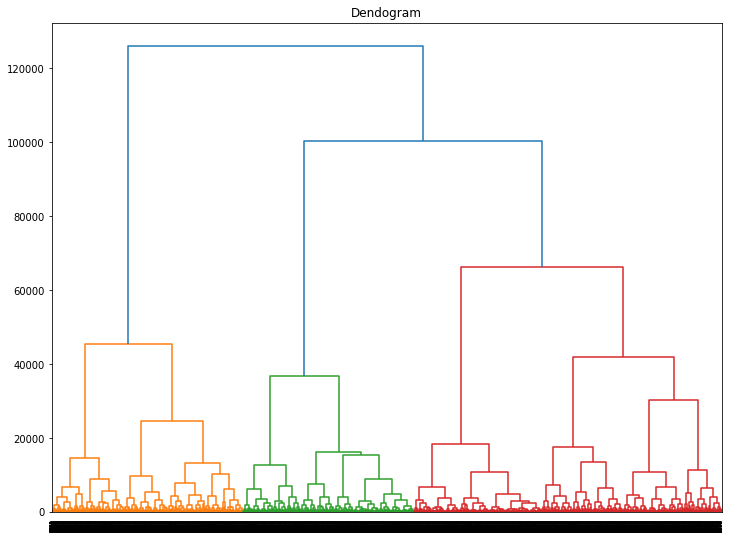

In [32]:
#visualize a dendogram
import matplotlib.pyplot as plt
import scipy.cluster.hierarchy as sch

def dendogram(X_random_df):
  plt.figure(figsize=(12,9))
  plt.title("Dendogram")
  dendo = sch.dendrogram(sch.linkage(X_random_df,method='ward',metric ="euclidean"))
  plt.show()
dendogram(X_random_df)

**Question**: Explain the procedure to find the optimal number of clusters using dendogram

Answer: </br>
The dendrogram can be analyzed to determine the optimal number of clusters. One way to do this is to look for the longest vertical line that does not intersect any horizontal lines. This line represents a cluster merge, and the number of clusters is given by the number of vertical lines intersected by this line.




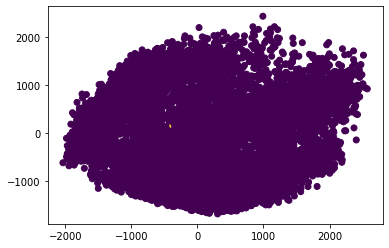

In [33]:
#visualisation of clusters using single linkage and complete linkage
hierarchical_clustering(X, 3, "single")


In [34]:
hierarchical_clustering(X, 3, "complete")

**Question:** Mention the differences observed using single and complete linkage:

Answer: </br>
Complete linkage can be a better option than Single linkage when dealing with data that contains noise or outliers. Single linkage clustering can create clusters that contain outliers, and these outliers can dominate the cluster by pulling in most of the other data points.

Using complete linkage can help avoid this problem because it considers the maximum distance between two points in different clusters, rather than the minimum distance between two points in the same cluster. This means that outliers are less likely to dominate a cluster and more likely to be assigned to their own cluster or excluded entirely.

## Part3: Image Compression

(635, 640, 3)


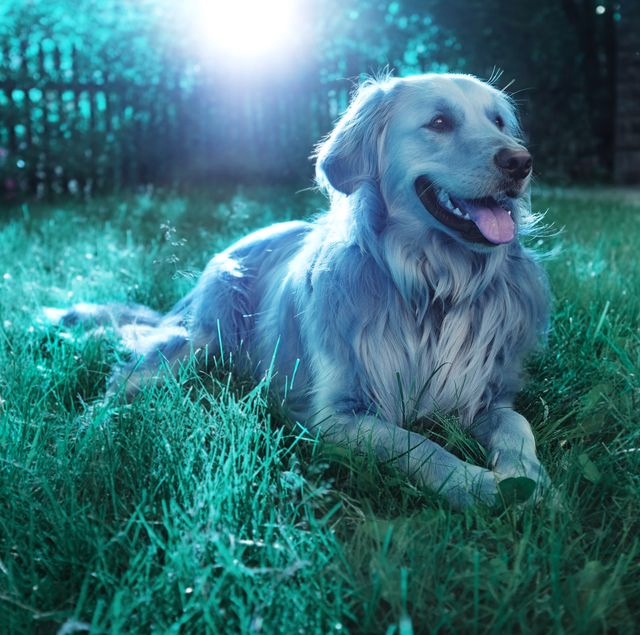

In [35]:
# Boiler plate code
from google.colab.patches import cv2_imshow
import cv2
img = cv2.imread('dog.jpg')
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

img_size = img.shape
print(img_size)
# Reshape it to be 2-dimension
X = img.reshape(img_size[0] * img_size[1], img_size[2])
cv2_imshow(img)
# print(X)
# print(X.shape)

In [36]:
m= img.shape[0]
n = img.shape[1]
kmeans = cluster.KMeans(n_clusters=7)
kmeans.fit(X)

KMeans(n_clusters=7)

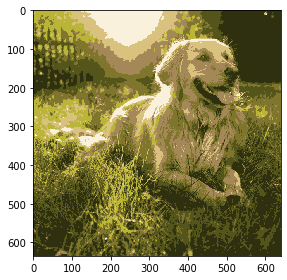

In [37]:
#Replace each pixel value with its nearby centroid
from skimage import io
compressed_image = kmeans.cluster_centers_[kmeans.labels_]
compressed_image = np.clip(compressed_image.astype('uint8'), 0, 255)

#Reshape the image to original dimension
compressed_image = compressed_image.reshape(m, n, 3)

#Save and display output image
io.imsave('comprlessed_image_64.png', compressed_image)
io.imshow(compressed_image)
io.show()